In [1]:
# simple classifier Boston

# following: https://www.kaggle.com/sanikamal/xgboost-boston-housing-dataset

# simple classifier for a joblib for a REACT example

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [129]:
# Data

boston = load_boston()

# Dataframe

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

#data=data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

data=data[['CRIM', 'RM', 'LSTAT']]

data['PRICE'] = boston.target

# Features & Target
X, y = data.iloc[:,:-1],data.iloc[:,-1]

# data matrix for xgboost
data_dmatrix = xgb.DMatrix(data=X,label=y)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [130]:
# infos ############################## leave out #####################################
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)
print(data.head())
print(data.info())
data.describe()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

,CRIM,RM,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000
mean,3.613524,6.284634,12.653063,22.532806
std,8.601545,0.702617,7.141062,9.197104
min,0.006320,3.561000,1.730000,5.000000
25%,0.082045,5.885500,6.950000,17.025000
50%,0.256510,6.208500,11.360000,21.200000
75%,3.677083,6.623500,16.955000,25.000000
max,88.976200,8.780000,37.970000,50.000000


XGBoost's hyperparameters

learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]

max_depth: determines how deeply each tree is allowed to grow during any boosting round

subsample: percentage of samples used per tree. Low value can lead to underfitting

colsample_bytree: percentage of features used per tree. High value can lead to overfitting

n_estimators: number of trees you want to build

objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision

binary:logistic for classification problems with probability


XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.

alpha: L1 regularization on leaf weights. A large value leads to more regularization.

lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [131]:
# Model

xg_reg = xgb.XGBRegressor(learning_rate = 0.01,max_depth = 10, alpha = 10, n_estimators = 100) #objective ='reg:linear', colsample_bytree = 0.3, 
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
#print(type(X_test))

RMSE: 8.919847
[09:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        21.786912        0.032263       21.790449       0.037811
1        19.791301        0.041478       19.828847       0.011885
2        18.094914        0.081877       18.159740       0.067573
3        16.515434        0.128078       16.588794       0.105863
4        15.058896        0.128618       15.177969       0.121780


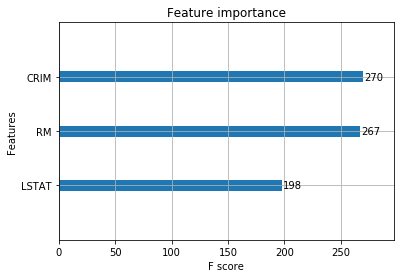

In [132]:
# Validation ################################################ not in production

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
print(cv_results.head())

#xg_reg_baum = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
#from xgboost import plot_tree ######### not working, Jupyter problem
#plot_tree(xg_reg_baum,num_trees=1)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

     target       pred
173    23.6  14.965973
274    32.4  18.518673
491    13.6  11.342069
72     22.8  14.929634
452    16.1  10.494740


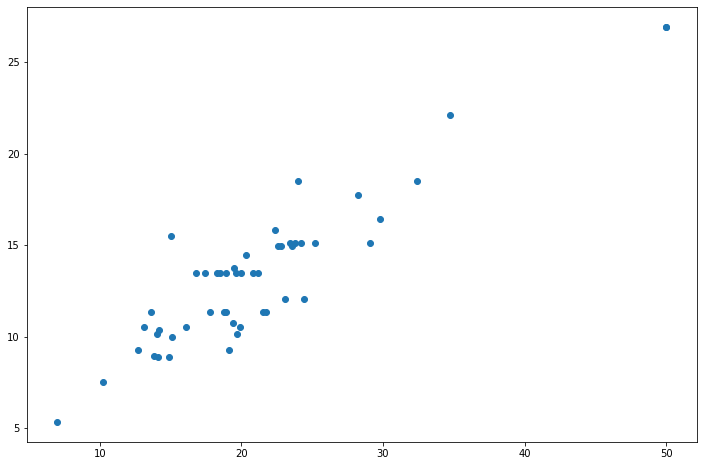

In [176]:
# predict test
num=0


preds = xg_reg.predict(X_test)
X_my=X_test
#prin
result = xg_reg.predict(X_my)

#preds = xg_reg.predict(a)
#i=X_test.index
#print(X_test.loc[[i[0]]])
#a=X_test.loc[[i[0]]]
#b=X_test.loc[[i[1]]]            
#print(a,b)
#c=pd.concat([a,b],axis=0)
#print(c)
#print(type(a))
#print(type(X_test))

#print(a.shape)
#print(X_test.shape)

#print(a)
#print(X_test.head())

#print(c)
#print(c.head())
#print(c.shape)

#data_dmatrix1 = xgb.DMatrix(data=a)
#preds = xg_reg.predict(X_test)
#preds = xg_reg.predict(c)

result=pd.DataFrame(data=y_test).rename(columns={'PRICE':'target'})
result['pred']=preds
print(result.head())
#print('Target: \n',y_test,'\nPredictions: \n',preds)
plt.scatter(result.target,result.pred)

In [177]:
# save the model to disk
import joblib
filename = 'joblib.sav'
joblib.dump(xg_reg, filename)

['joblib.sav']

In [118]:
import joblib
# load the model from disk
filename = 'joblib.sav'
loaded_model = joblib.load(filename)

In [5]:
# test loaded
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

NameError: name 'xg_reg' is not defined

In [ ]:
##########################################################################################################################

In [3]:
# production ##################################################################

import pandas as pd
import xgboost as xgb
import joblib

filename = 'joblib.sav'
model = joblib.load(filename)

new_data={'CRIM':[0.09178],'RM':[6.416],'LSTAT':[9.04]}
preds = model.predict(pd.DataFrame(data=new_data,columns=['CRIM', 'RM', 'LSTAT']))
print(preds)

[14.965973]
